In [125]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold , SelectKBest , f_classif , mutual_info_classif
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split



In [126]:
data=pd.read_csv("train.csv")
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [128]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [129]:
# Extract All differents Types data columns :

obj_cols=data.select_dtypes("object").columns

print("objected_columns:",obj_cols)

num_cols=data.select_dtypes("number").columns

print("Numerical_columns:",num_cols)

Disc_cols=data.select_dtypes(include=["int64"]).columns

print("discrete_columns:",Disc_cols)

cont_cols=data.select_dtypes(include=["float64"]).columns

print("Continous_columns:",cont_cols)



objected_columns: Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')
Numerical_columns: Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')
discrete_columns: Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')
Continous_columns: Index([], dtype='object')


In [130]:
data.describe(include=["O"])

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


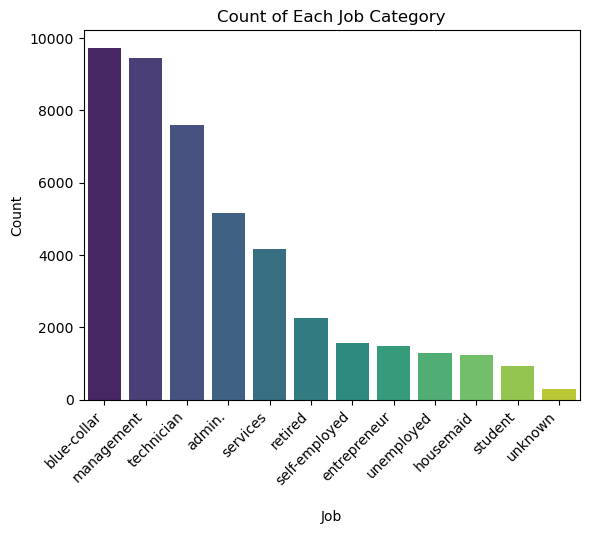

In [131]:
# Define counts
job_counts = data['job'].value_counts()

# Plot bar chart
sns.barplot(x=job_counts.index, y=job_counts.values, palette='viridis')

# Add labels and title
plt.title('Count of Each Job Category')
plt.xlabel('\nJob')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


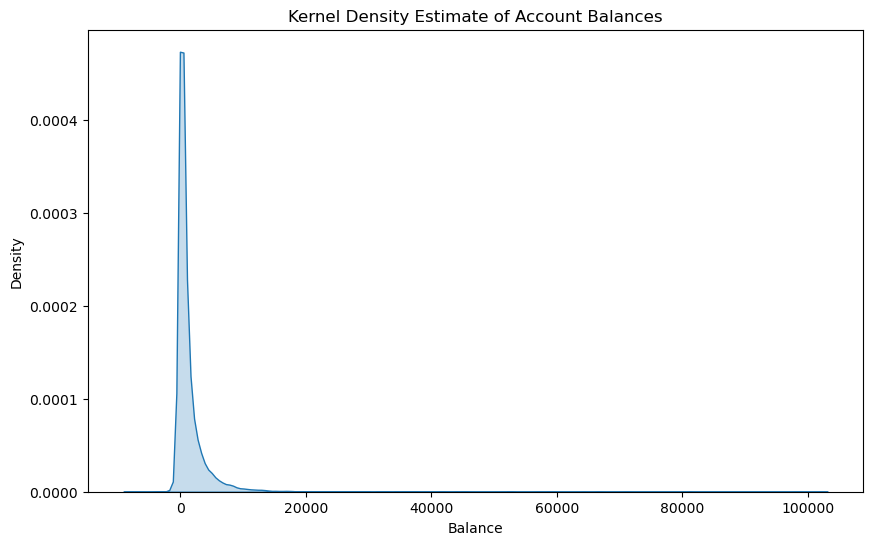

In [132]:
# Define figure size
plt.figure(figsize=(10, 6))

# Plot the histogram
sns.kdeplot(data['balance'],shade=True)

# Add labels and title
plt.title('Kernel Density Estimate of Account Balances')
plt.xlabel('Balance')
plt.ylabel('Density')

# Show the plot
plt.show()

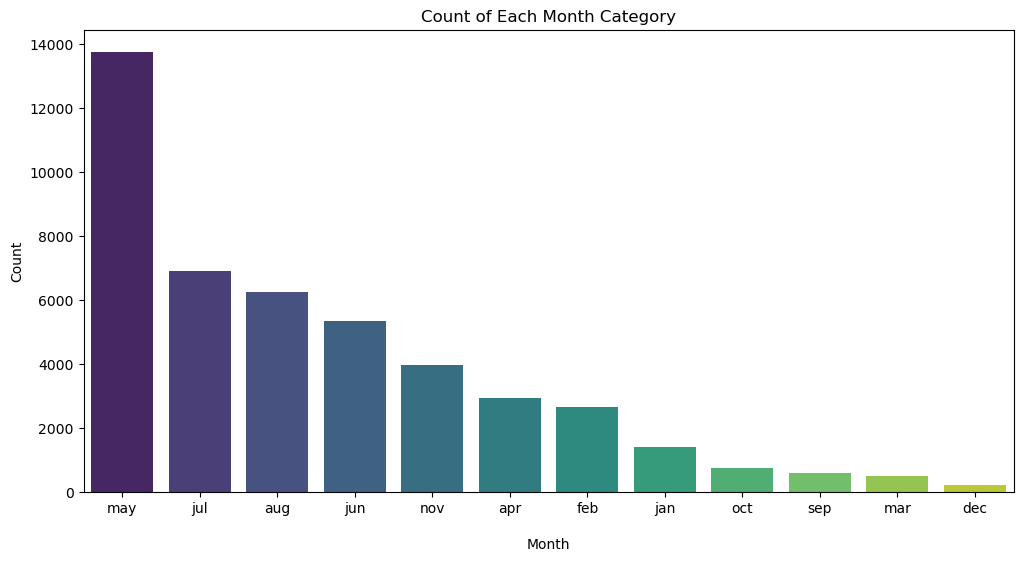

In [133]:
month_counts = data['month'].value_counts()

# Define figure size
plt.figure(figsize=(12, 6))

# Plot bar chart
sns.barplot(x=month_counts.index, y=month_counts.values, palette='viridis')

# Add labels and title
plt.title('Count of Each Month Category')
plt.xlabel('\nMonth')
plt.ylabel('Count')

# Show the plot
plt.show()


In [134]:
house=data["housing"].value_counts()
house

yes    25130
no     20081
Name: housing, dtype: int64

G:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Duration_Distrbution'}, xlabel='duration', ylabel='Density'>

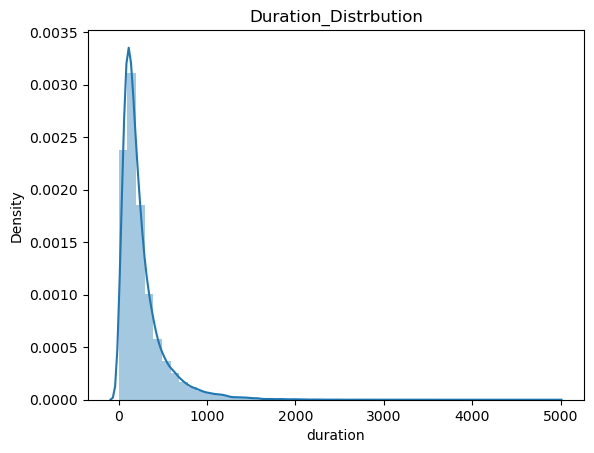

In [135]:
plt.title("Duration_Distrbution")
plt.xlabel("Duration")
sns.distplot(data["duration"])

Text(0.5, 1.0, 'housing-loan')

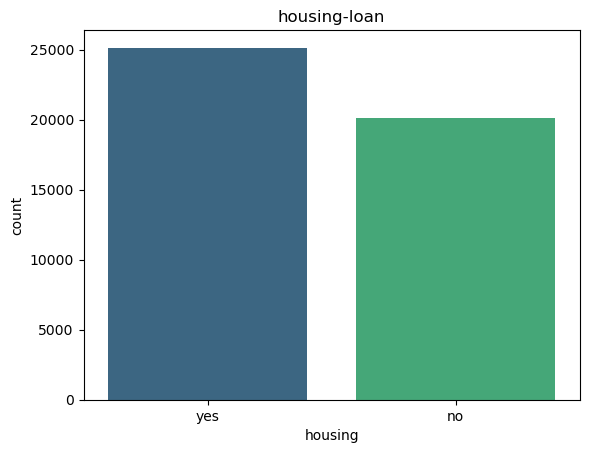

In [136]:
sns.barplot(x=house.index,y=house.values, palette='viridis')

#Labels & titles :
plt.xlabel("housing")
plt.ylabel("count")
plt.title("housing-loan")

<AxesSubplot:ylabel='marital'>

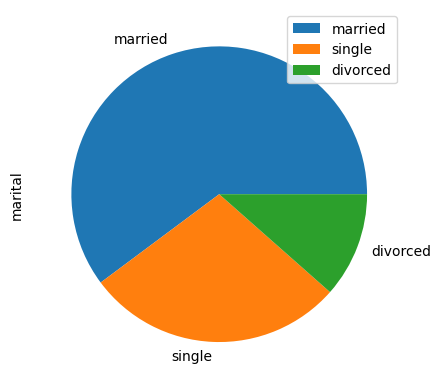

In [137]:
data["marital"].value_counts().plot(kind="pie",legend=True)

<AxesSubplot:xlabel='marital'>

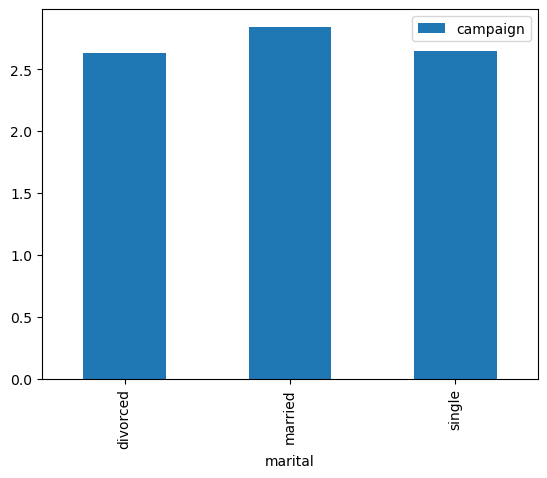

In [138]:
data.groupby(["marital"])["campaign"].mean().plot(kind="bar",legend=True)

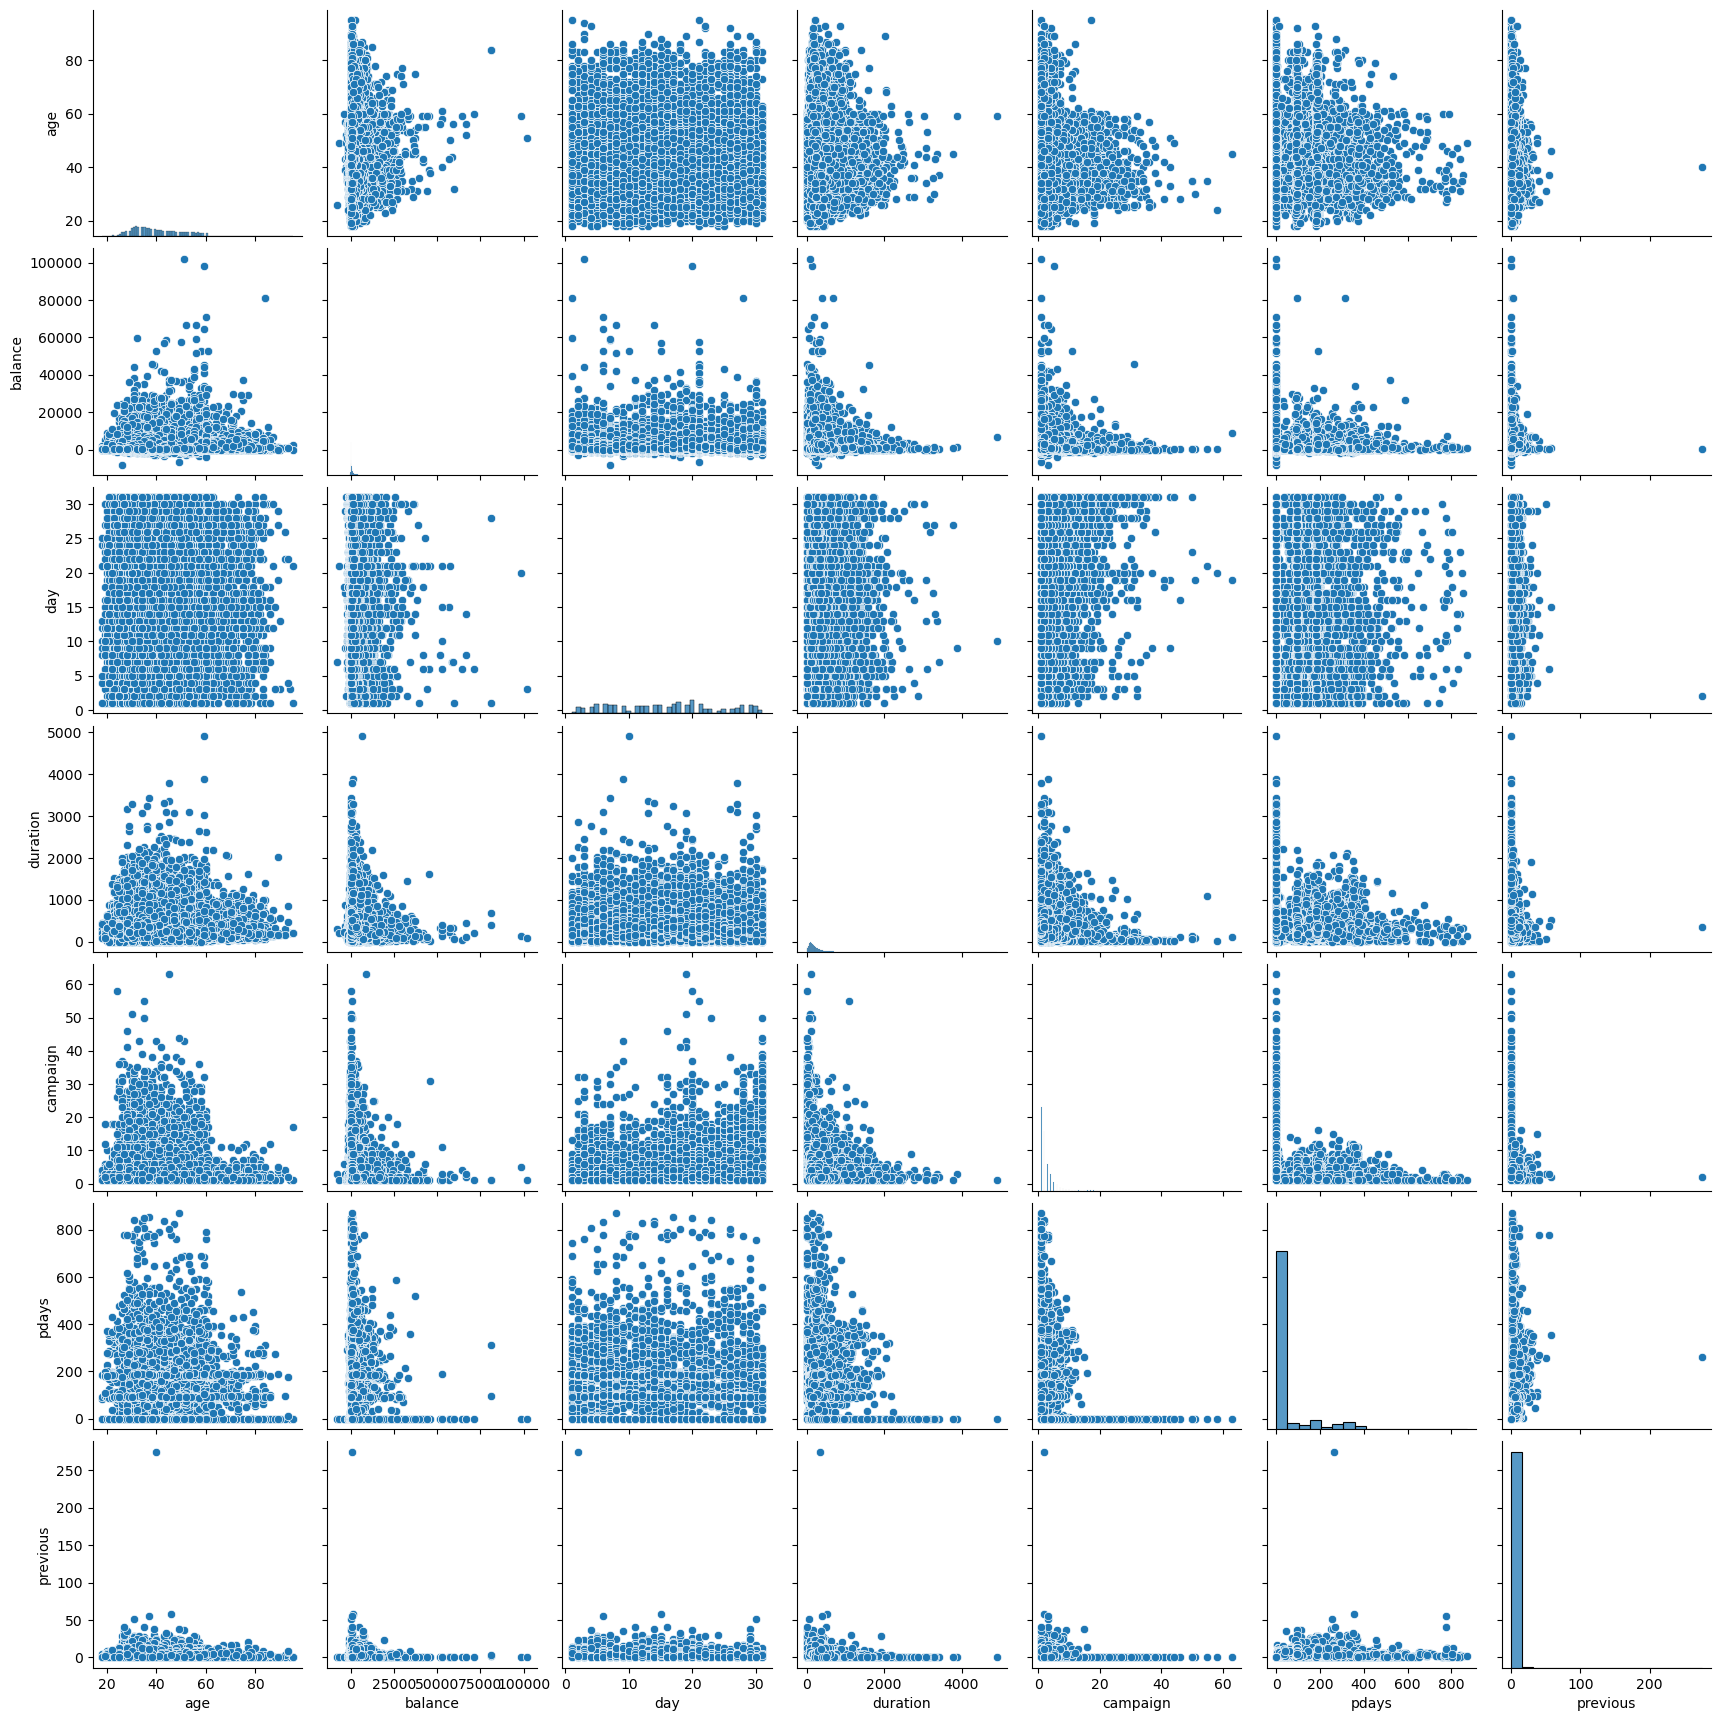

In [139]:

sns.pairplot(data.select_dtypes(include=["int64"]))


In [141]:
data["age"].describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

<AxesSubplot:ylabel='loan'>

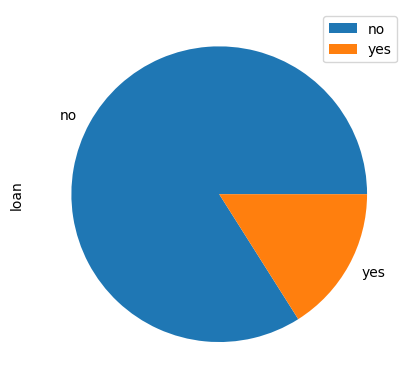

In [140]:
data["loan"].value_counts().plot(kind="pie",legend="True")

<AxesSubplot:xlabel='age', ylabel='Density'>

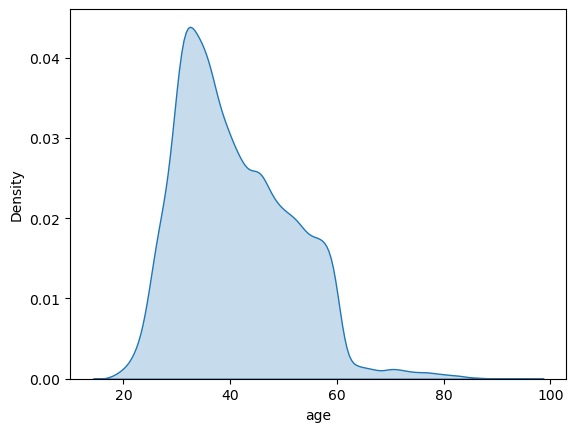

In [12]:
sns.kdeplot(data["age"],shade=True)

G:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
G:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='day', ylabel='Density'>

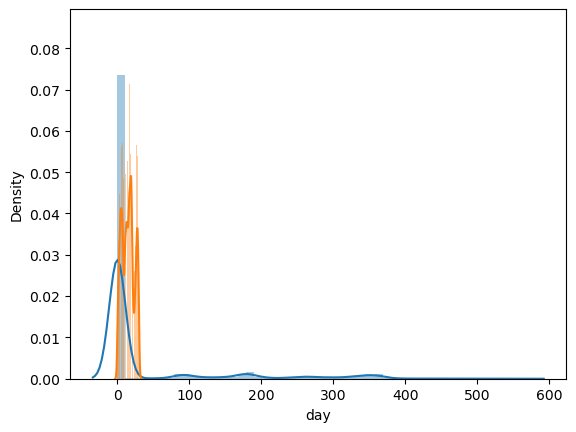

In [68]:
sns.distplot(data["pdays"])
sns.distplot(data["day"])

<AxesSubplot:>

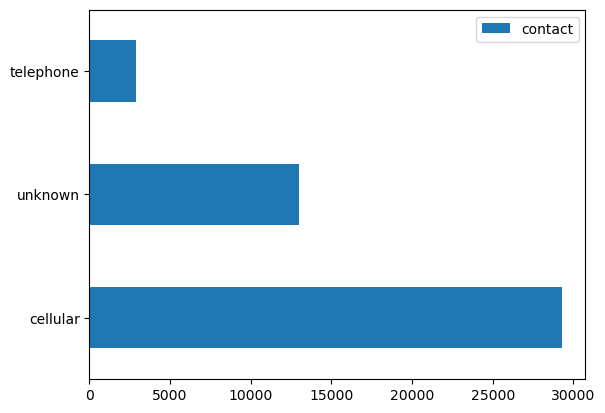

In [14]:
data["contact"].value_counts().plot(kind="barh",legend=True)

<AxesSubplot:xlabel='duration', ylabel='balance'>

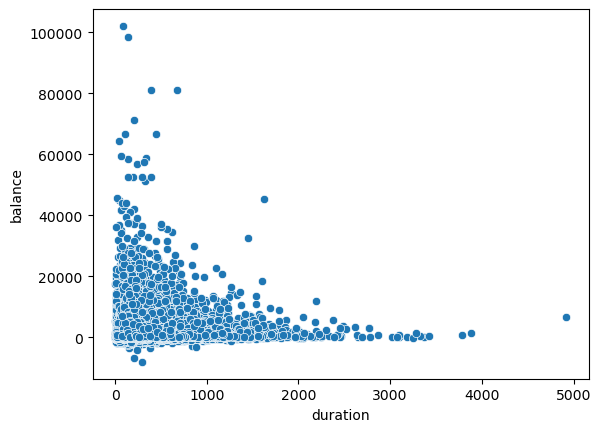

In [15]:
sns.scatterplot(x=data["duration"],y=data["balance"])

G:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


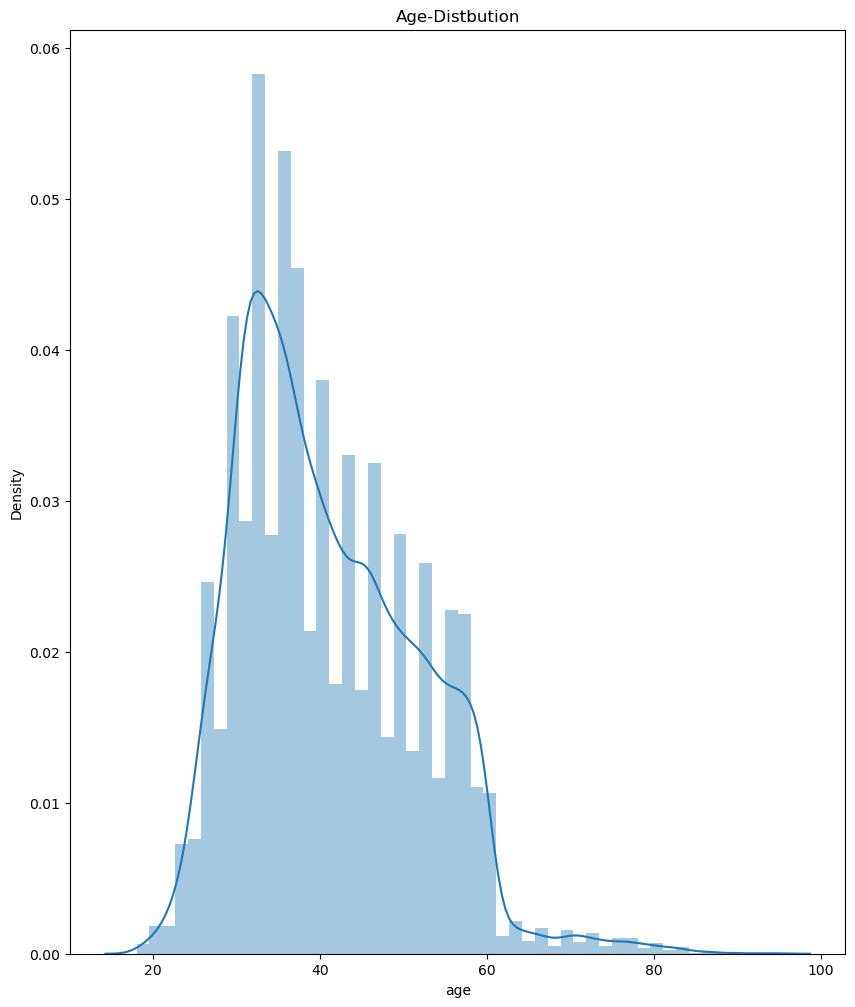

In [16]:
plt.figure(figsize=(10,12))
sns.distplot(data["age"])
plt.title("Age-Distbution")
plt.show()

<AxesSubplot:>

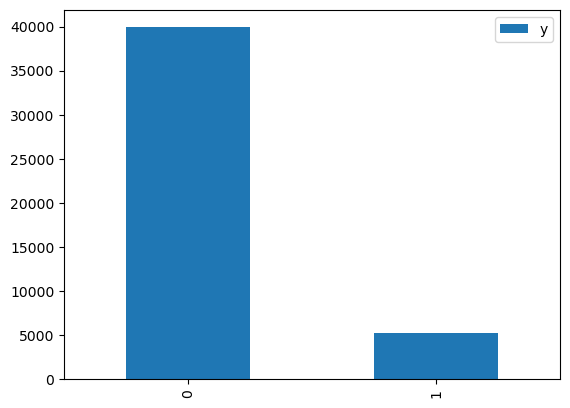

In [112]:
data["y"].value_counts().plot(kind="bar",legend=True)

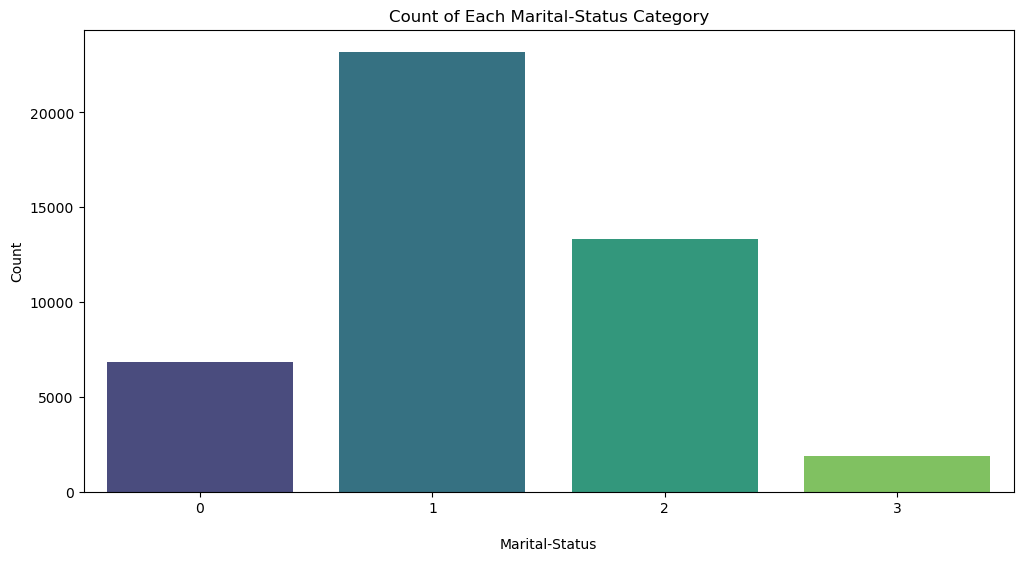

In [107]:
plt.figure(figsize=(12, 6))
edu=data["education"].value_counts()
sns.barplot(x=edu.index, y=edu.values, palette='viridis')

# Add labels and title

plt.title('Count of Each Marital-Status Category')
plt.xlabel('\nMarital-Status')
plt.ylabel('Count')

# show:

plt.show()

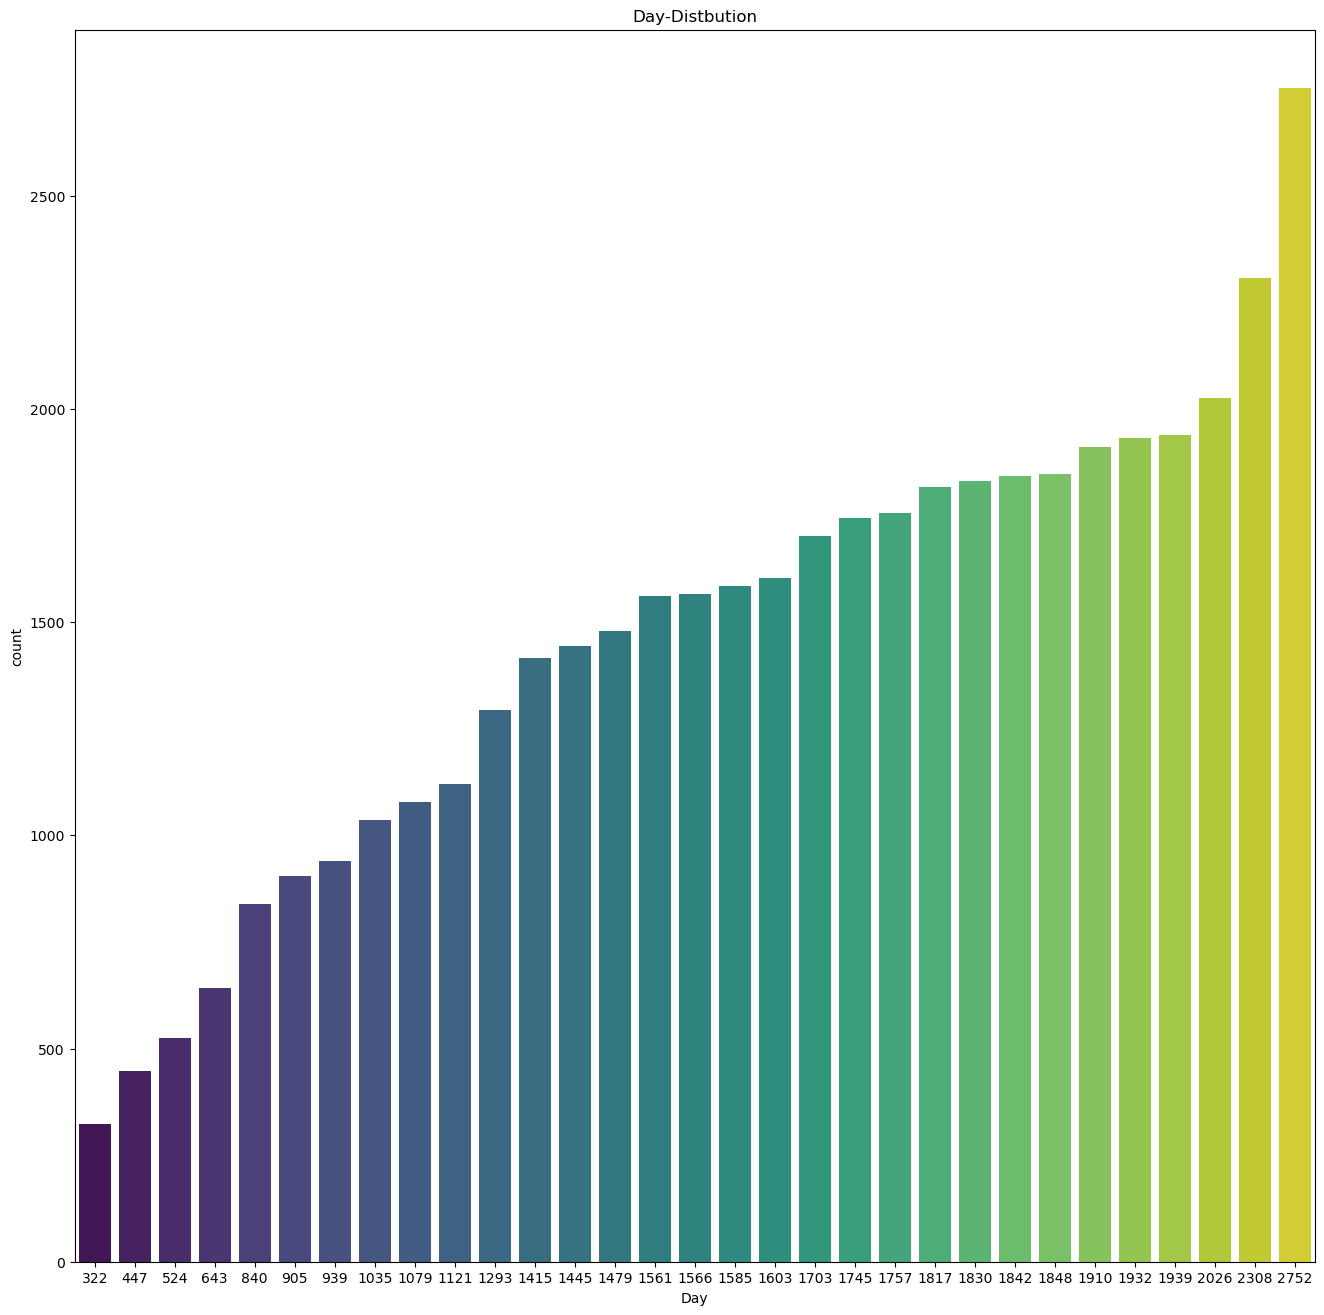

In [23]:

plt.figure(figsize=(16,16))
sns.barplot(x=data["day"].value_counts(),y=data["day"].value_counts(),palette='viridis')

#names:

plt.xlabel("Day")
plt.ylabel("count")
plt.title("Day-Distbution")
plt.show()

In [17]:
# preprocessing the data:
#check if there is any missing values:

data.isna().mean()

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
y            0.0
dtype: float64

In [18]:
# check the outliers:

data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


<AxesSubplot:xlabel='balance'>

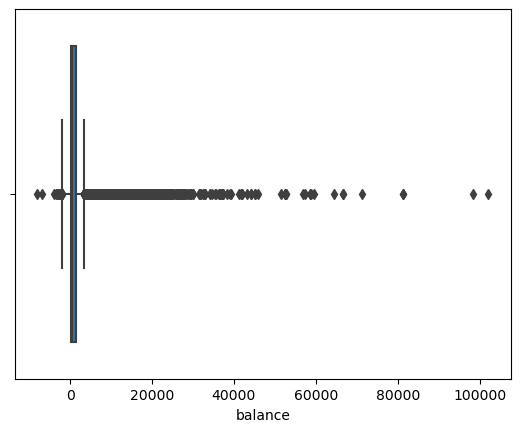

In [19]:
# from the last statistical step:
# there outliers in balance,duration,campaign,pdays,previous

sns.boxplot(x=data["balance"])

<AxesSubplot:xlabel='previous'>

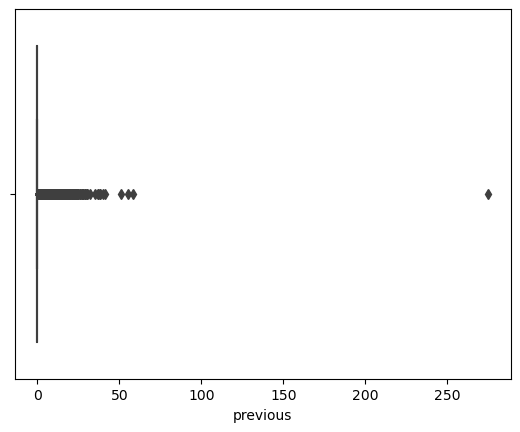

In [20]:
sns.boxplot(x=data["previous"])

<AxesSubplot:xlabel='duration'>

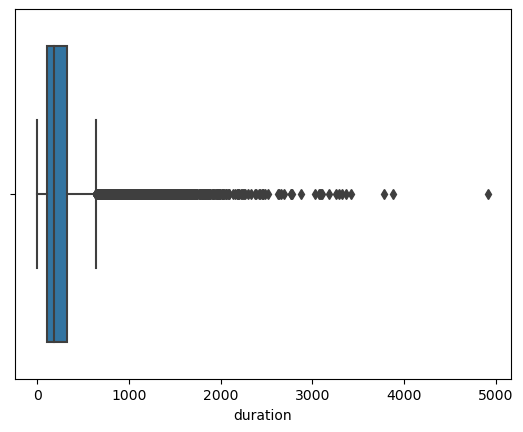

In [21]:
sns.boxplot(x=data["duration"])

<AxesSubplot:xlabel='campaign'>

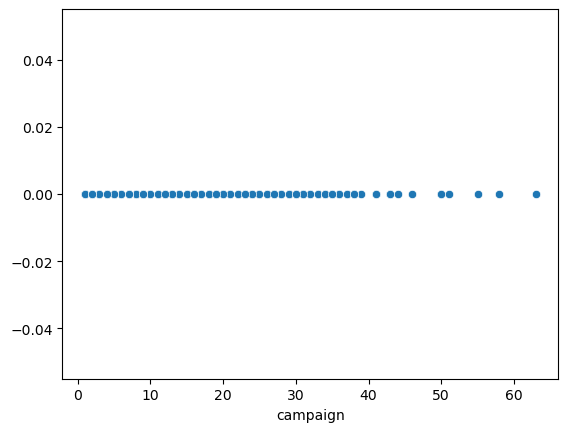

In [22]:
sns.scatterplot(x=data["campaign"],y=np.zeros_like(data["campaign"]))

<AxesSubplot:xlabel='previous'>

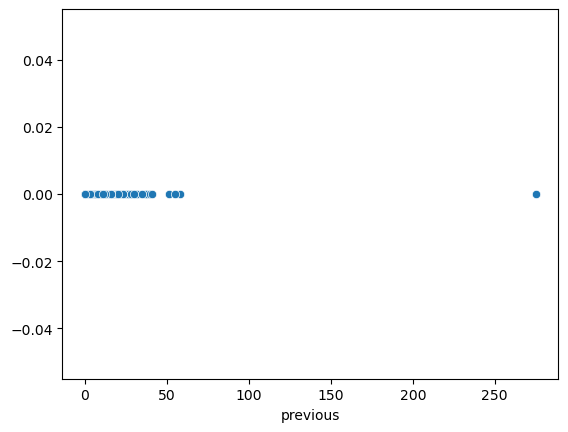

In [23]:
sns.scatterplot(x=data["previous"],y=np.zeros_like(data["previous"]))

In [24]:
# from all that features , calc the outliers for previous



q1,q3=data["previous"].quantile([0.25,0.75])

Iqr=q3-q1


low_limit=q1-1.5*Iqr

upper_limit=q3+1.5*Iqr

outlier=[]

for x in data["previous"]:
    if((x<low_limit) or (x>upper_limit)):
        outlier.append(x)
        
print("Numberof outliers=",len(outlier))
print(f"value of Q1 ={q1} and value of Q3={q3} and value of Iqr ={Iqr} ")
print(f"lower_limit={low_limit} and uppper_limit ={upper_limit}")



Numberof outliers= 8257
value of Q1 =0.0 and value of Q3=0.0 and value of Iqr =0.0 
lower_limit=0.0 and uppper_limit =0.0


In [25]:
# from all that features , calc the outliers for duration



q1,q3=data["duration"].quantile([0.25,0.75])

Iqr=q3-q1


low_limit=q1-1.5*Iqr

upper_limit=q3+1.5*Iqr

outlier=[]

for x in data["duration"]:
    if((x<low_limit) or (x>upper_limit)):
        outlier.append(x)
        
print("Numberof outliers=",len(outlier))
print(f"value of Q1 ={q1} and value of Q3={q3} and value of Iqr ={Iqr} ")
print(f"lower_limit={low_limit} and uppper_limit ={upper_limit}")


Numberof outliers= 3235
value of Q1 =103.0 and value of Q3=319.0 and value of Iqr =216.0 
lower_limit=-221.0 and uppper_limit =643.0


In [26]:
# calculate VarianceThershold & correlation:

selector=VarianceThreshold(threshold=0.01)
selector.fit(data.select_dtypes("number"))

VarianceThreshold(threshold=0.01)

In [27]:
selector.get_support(indices=True)

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [28]:
num_cols[selector.get_support(indices=True)]

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [29]:
data.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no


In [30]:
# calc the correlation:

data.select_dtypes("number").corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


In [31]:
# differents of methods correlations:

#1- pearson:


data.select_dtypes("number").corr(method="pearson")

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


In [32]:
#2-spearman:

data.select_dtypes("number").corr(method="spearman")

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.096380,-0.008948,-0.033257,0.037136,-0.017468,-0.011900
balance,0.096380,1.000000,0.001329,0.042651,-0.030959,0.069676,0.079536
day,-0.008948,0.001329,1.000000,-0.058142,0.139581,-0.092226,-0.087780
duration,-0.033257,0.042651,-0.058142,1.000000,-0.107962,0.028698,0.031175
campaign,0.037136,-0.030959,0.139581,-0.107962,1.000000,-0.112284,-0.108448
pdays,-0.017468,0.069676,-0.092226,0.028698,-0.112284,1.000000,0.985645
previous,-0.011900,0.079536,-0.087780,0.031175,-0.108448,0.985645,1.000000


In [33]:
#3-kendall:


data.select_dtypes("number").corr(method="kendall")

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.065226,-0.006681,-0.022444,0.027816,-0.013679,-0.009518
balance,0.065226,1.000000,0.001242,0.028586,-0.022924,0.054180,0.062863
day,-0.006681,0.001242,1.000000,-0.039337,0.105353,-0.072813,-0.070418
duration,-0.022444,0.028586,-0.039337,1.000000,-0.079976,0.022478,0.024689
campaign,0.027816,-0.022924,0.105353,-0.079976,1.000000,-0.096802,-0.094371
pdays,-0.013679,0.054180,-0.072813,0.022478,-0.096802,1.000000,0.902709
previous,-0.009518,0.062863,-0.070418,0.024689,-0.094371,0.902709,1.000000


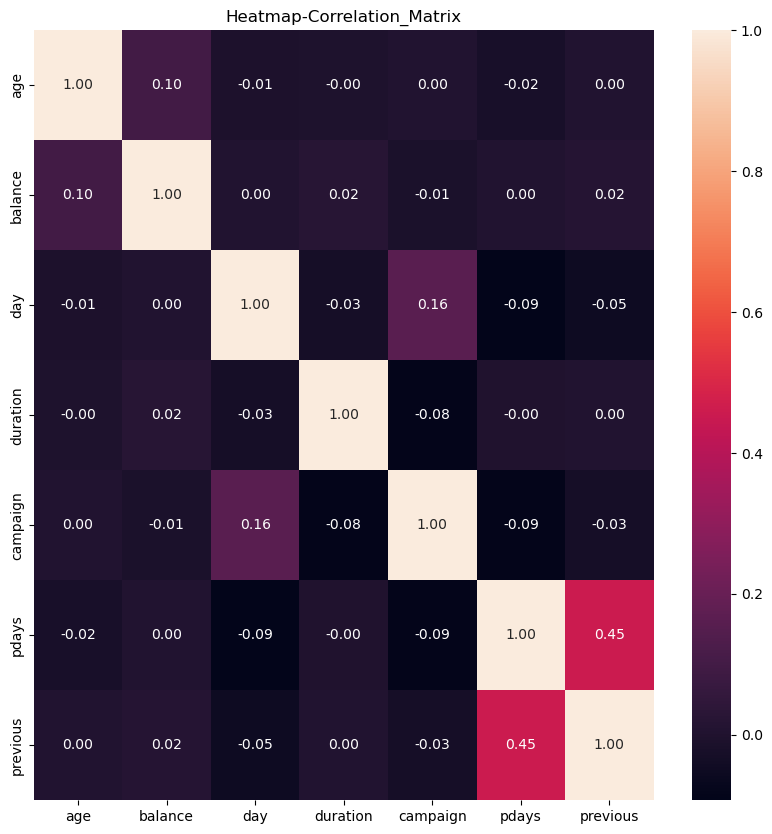

In [24]:
# Heatmap correlation Matrix:

data.select_dtypes("number")
plt.figure(figsize=(10,10))
plt.title("Heatmap-Correlation_Matrix")
sns.heatmap(data.select_dtypes("number").corr(),annot=True,fmt="0.2f")
plt.show()

In [26]:
fs=SelectKBest(score_func=f_classif,k=5)
fs.fit(data.drop(columns="y").select_dtypes("number").fillna(0),data["y"])


SelectKBest(k=5)

In [27]:
print(["{:10f}".format(p)for p in fs.pvalues_])
print(["{:10f}".format(p)for p in fs.scores_])

['  0.000000', '  0.000000', '  0.000000', '  0.000000', '  0.000000', '  0.000000', '  0.000000']
[' 28.625233', '126.572276', ' 36.359010', '8333.761148', '243.358404', '490.696563', '396.443989']


In [28]:
# the most numerical related with each other: 

pvalues_features=pd.DataFrame(fs.pvalues_)
scores_features=pd.DataFrame(fs.scores_)
features=pd.DataFrame(data.drop(columns="y").select_dtypes("number").fillna(0).columns)
feature_score=pd.concat([pvalues_features,scores_features,features],axis=1)
feature_score.columns=["pvalues","scores","inputs"]
feature_score

,pvalues,scores,inputs
0,8.825644e-08,28.625233,age
1,2.521114e-29,126.572276,balance
2,1.653880e-09,36.359010,day
3,0.000000e+00,8333.761148,duration
4,1.012347e-54,243.358404,campaign
5,3.790553e-108,490.696563,pdays
6,7.801830e-88,396.443989,previous


In [30]:
# select the most categorical features are related:

mic=SelectKBest(score_func=mutual_info_classif,k=5)
mic.fit(data.drop(columns="y").select_dtypes("number").fillna(0),data["y"])

features_MI_scores=pd.Series(mic.scores_,index=data.drop(columns="y").select_dtypes("number").fillna(0).columns)
features_MI_scores.sort_values(ascending=True)

day         0.005329
campaign    0.005339
age         0.010764
previous    0.011874
balance     0.021312
pdays       0.027471
duration    0.071101
dtype: float64

In [33]:
# translation objected data into numerical (floating):

label_encoder=LabelEncoder()

for col in data:
    data[col]=label_encoder.fit_transform((data[col]))
    
data    

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,40,4,1,2,0,3036,1,0,2,4,8,261,0,0,0,3,0
1,26,9,2,1,0,945,1,0,2,4,8,151,0,0,0,3,0
2,15,2,1,1,0,918,1,1,2,4,8,76,0,0,0,3,0
3,29,1,1,3,0,2420,1,0,2,4,8,92,0,0,0,3,0
4,15,11,2,3,0,917,0,0,2,4,8,198,0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,33,9,1,2,0,1741,0,0,0,16,9,975,2,0,0,3,1
45207,53,5,0,0,0,2639,0,0,0,16,9,456,1,0,0,3,1
45208,54,5,1,1,0,5455,0,0,0,16,9,1116,4,181,3,2,1
45209,39,1,1,1,0,1584,0,0,1,16,9,508,3,0,0,3,0


In [34]:
# Divide the data into x,y:

x=data.drop("y",axis=1)
y=data["y"]


In [55]:
# divide data into train,test (train_test_split):
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=42)
x_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
6377,27,2,1,0,0,816,1,0,2,26,8,240,5,0,0,3
17236,11,7,2,1,0,1082,0,1,0,27,5,108,7,0,0,3
4490,13,0,2,1,0,1037,1,0,2,19,8,187,0,0,0,3
24231,22,6,2,2,0,2603,1,0,0,16,9,353,0,0,0,3
3978,10,7,2,1,0,1233,1,0,2,15,8,21,2,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,26,3,2,0,0,1975,0,0,2,17,6,1527,0,0,0,3
44732,5,8,2,2,0,1424,0,0,0,7,11,210,0,89,1,0
38158,16,9,0,2,0,2233,1,0,0,14,8,239,0,0,0,3
860,15,5,1,1,0,1081,0,0,2,6,8,111,0,0,0,3


In [56]:
# predict with RandomForest:

model1=RandomForestClassifier(n_estimators=100,max_depth=5)
model1.fit(x_train,y_train)

RandomForestClassifier(max_depth=5)

In [57]:
model1.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [58]:
y_predict=model1.predict(x_test)
y_predict[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [122]:
print(f"accuracy ---->>>{model1.score(x_test,y_test)*100:0.2f}%")

accuracy ---->>>89.20%


In [61]:
# At which tree the accuracity was the bigger:
np.random.seed()


for i in range(10,101,10):
    print(f"at n_estimators={i} accuracy=")
    model2=RandomForestClassifier(n_estimators=i).fit(x_test,y_test)
    print(f"accuracy={model2.score(x_test,y_test)*100:0.2f}%")

at n_estimators=10 accuracy=
accuracy=99.17%
at n_estimators=20 accuracy=
accuracy=99.70%
at n_estimators=30 accuracy=
accuracy=99.93%
at n_estimators=40 accuracy=
accuracy=99.95%
at n_estimators=50 accuracy=
accuracy=99.99%
at n_estimators=60 accuracy=
accuracy=100.00%
at n_estimators=70 accuracy=
accuracy=99.99%
at n_estimators=80 accuracy=
accuracy=99.99%
at n_estimators=90 accuracy=
accuracy=100.00%
at n_estimators=100 accuracy=
accuracy=99.99%


In [70]:
# model Descion Tree:

model3=tree.DecisionTreeClassifier(max_depth=5,random_state=42)
model3.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [71]:
model3.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [72]:
print(f"accuracy={model3.score(x_test,y_test)*100:0.2f}%")

accuracy=89.62%


In [75]:
text_represention=tree.export_text(model3)
print(text_represention)

|--- feature_11 <= 466.50
|   |--- feature_10 <= 9.50
|   |   |--- feature_0 <= 42.50
|   |   |   |--- feature_13 <= 9.50
|   |   |   |   |--- feature_10 <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_10 >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_13 >  9.50
|   |   |   |   |--- feature_15 <= 1.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_15 >  1.50
|   |   |   |   |   |--- class: 1
|   |   |--- feature_0 >  42.50
|   |   |   |--- feature_11 <= 225.00
|   |   |   |   |--- feature_11 <= 125.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_11 >  125.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_11 >  225.00
|   |   |   |   |--- feature_15 <= 1.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_15 >  1.50
|   |   |   |   |   |--- class: 1
|   |--- feature_10 >  9.50
|   |   |--- feature_11 <= 129.50
|   |   |   |--- feature_11 <= 79.50
|   |   |   |   |--- class: 0
|   |   |

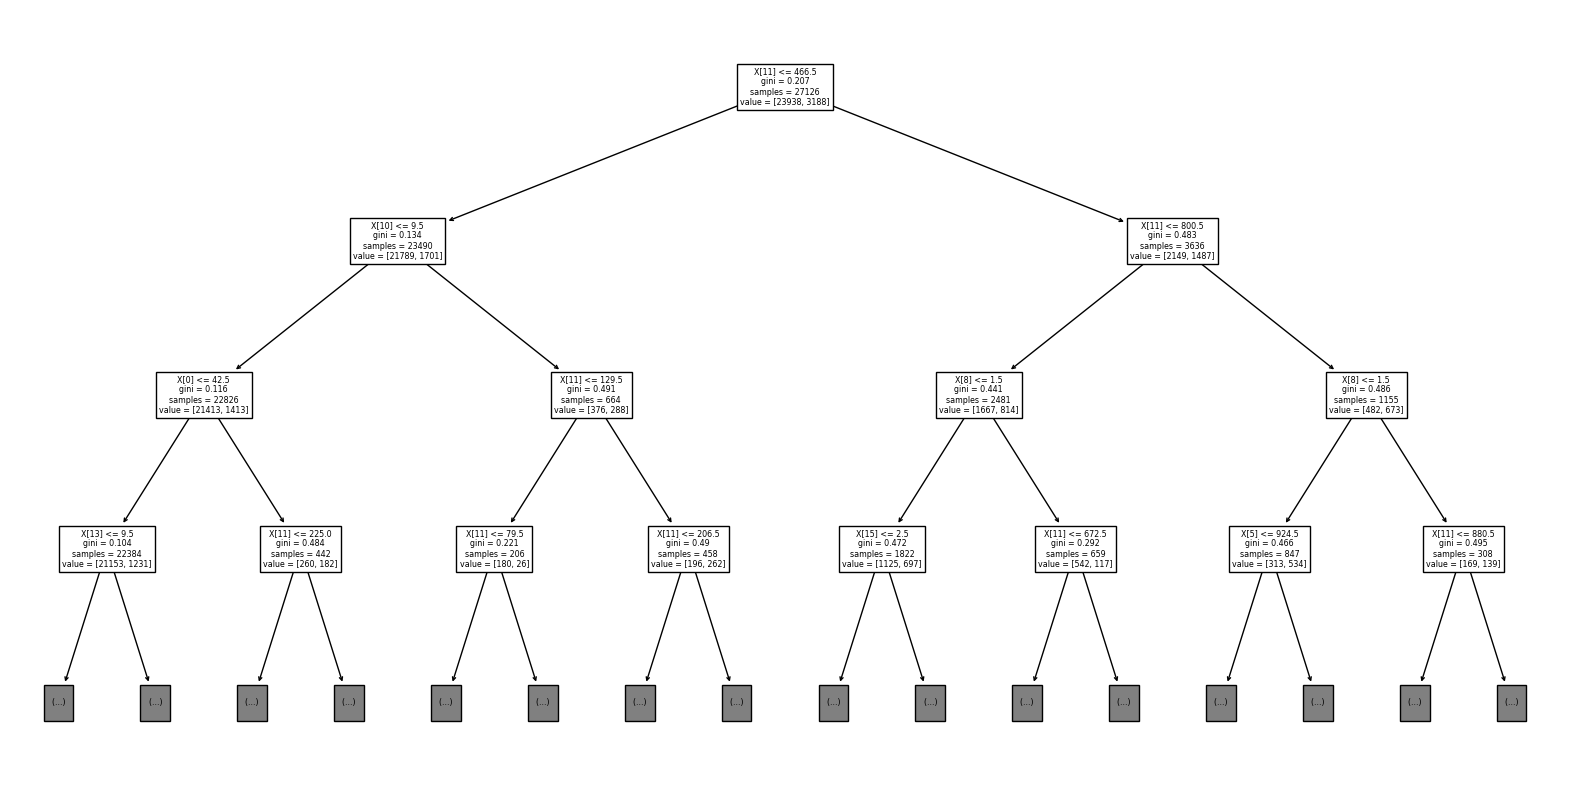

In [124]:
plt.figure(figsize=(20,10))
plt.title("-------------->>>>>>>Descion Tree <<<<<<<--------------")
tree.plot_tree(model3,max_depth=3)
plt.show()